# A/B Testing

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Sampling (Örnekleme)

populasyon = np.random.randint(0, 80, 10000)
populasyon.mean()

39.6409

In [3]:
np.random.seed(10)

# ".seed()" metodu, rastgele bir işlevin durumunu kaydetmek için kullanılır, 
# böylece aynı bilgisayarda veya farklı bilgisayarlarda kodun birden çok yürütülmesinde aynı rasgele sayıları üretebilir.

orneklem1 = np.random.choice(a=populasyon, size=100)
orneklem1.mean()


41.58

In [4]:
orneklem2 = np.random.choice(a=populasyon, size=100)
orneklem3 = np.random.choice(a=populasyon, size=100)
orneklem4 = np.random.choice(a=populasyon, size=100)
orneklem5 = np.random.choice(a=populasyon, size=100)
orneklem6 = np.random.choice(a=populasyon, size=100)
orneklem7 = np.random.choice(a=populasyon, size=100)
orneklem8 = np.random.choice(a=populasyon, size=100)
orneklem9 = np.random.choice(a=populasyon, size=100)
orneklem10 = np.random.choice(a=populasyon, size=100)

In [5]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean()
 + orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10

40.035000000000004

Örnek sayısı ya da örneklem sayısı arttığında bu örneklem dağılımının ya da dağılımlarının ortalamalarının ortalaması da ana kütlenin ortalamasına yakınlaşıyor olacaktır.

### Descriptive Statistics (Betimsel İstatistikler)

In [6]:
df = sns.load_dataset("tips")
df.describe().T

# .describe() metodu sayısal deişkenleri seçerek onları betimler. 
# Bize elimizdeki veri ile ilgili hızlı bir şekilde bilgi edinebileceğimiz temel istatistikleri verir.

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### Confidence Intervals (Güven Aralıkları)

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
sms.DescrStatsW(df["total_bill"]).tconfint_mean()

# % 95 güven düzeyinde total bills'in ortalaması bu aralıkta olacaktır.

(18.66333170435847, 20.908553541543164)

In [9]:
sms.DescrStatsW(df["tip"]).tconfint_mean()

# % 95 güven düzeyinde tip'in ortalaması bu aralıkta olacaktır.

(2.8237993062818205, 3.172758070767359)

In [10]:
# Titanic Veri Setindeki Sayısal Değişkenler için Güven Aralığı Hesabı
df = sns.load_dataset("titanic")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
sms.DescrStatsW(df["age"].dropna()).tconfint_mean()

(28.631790041821507, 30.766445252296133)

In [12]:
sms.DescrStatsW(df["fare"].dropna()).tconfint_mean()

(28.936831234567347, 35.47158470258195)

### Correlation (Korelasyon)

In [13]:
# Bahşiş veri seti:
# total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)
# tip: bahşiş
# sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)
# smoker: grupta sigara içen var mı? (0=No, 1=Yes)
# day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)
# time: ne zaman? (0=Day, 1=Night)
# size: grupta kaç kişi var?

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# Burada ödenen bahşiş ile hesap arasında bir korelasyon olup olmadığını kontrol edeceğiz,

df["total_bill"] = df["total_bill"] - df["tip"]

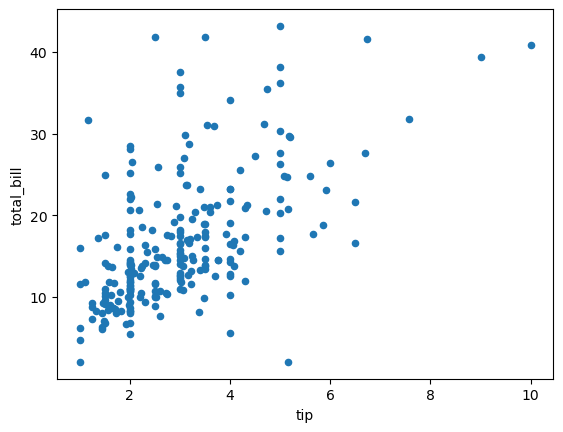

In [15]:
df.plot.scatter("tip", "total_bill")
plt.show()


In [16]:
df["tip"].corr(df["total_bill"])

0.5766634471096381

### AB Testi ( Bağımsız İki Örneklem T Testi )


In [17]:
# 1. Hipotezleri Kur
# 2. Varsayım Kontrolü
#   - 1. Normallik Varsayımı
#   - 2. Varyans Homojenliği
# 3. Hipotezin Uygulanması
#   - 1. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)
#   - 2. Varsayımlar sağlanmıyorsa mannwhitneyu testi (non-parametrik test)
# 4. p-value değerine göre sonuçları yorumla
# Not:
# - Normallik sağlanmıyorsa direk 2 numara. Varyans homojenliği sağlanmıyorsa 1 numaraya arguman girilir.
# - Normallik incelemesi öncesi aykırı değer incelemesi ve düzeltmesi yapmak faydalı olabilir.

In [18]:
# Uygulama 1: Sigara İçenler ile İçmeyenlerin Hesap Ortalamaları Arasında istatistiksel olarak Anlamlı bir Fark var mı?

df = sns.load_dataset("tips")
df.head()

df.groupby("smoker").agg({"total_bill": "mean"})

,total_bill
smoker,
Yes,20.756344
No,19.188278


In [19]:
# 1. Hipotezi Kur

# H0: M1 = M2
# H1: M1 != M2

In [20]:
# 2. Varsayım Kontrolü

# Normallik Varsayımı
# Varyans Homojenliği

In [21]:
# Normallik Varsayımı

# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1:..sağlanmamaktadır.

# Shapiro testi bir değişkenin dağılımının normal olup olmadığını test eder.

In [22]:
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "Yes", "total_bill"])
print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue,4)}')

# p-value < 0.05' tir. Dolayısıyla H0 hipotezi reddedilmiştir. Yani sigara içen kişilerin ödedikleri toplam hesap normal dağılmamıştır.

Test Stat = 0.9367, p-value = 0.0002


In [23]:
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "No", "total_bill"])
print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue,4)}')

# p-value < 0.05' tir. Dolayısıyla H0 hipotezi reddedilmiştir. Yani sigara içmeyen kişilerin ödedikleri toplam hesap normal dağılmamıştır.

Test Stat = 0.9045, p-value = 0.0


Değişkenlerden dolayı normallik varsayımları sağlanmıyor. Dolayısıyla non-parametrik bir test kullanılacak.

Lakin yine de alıştırma olması açısından varyansların da homojenliğine bakacağız.

In [24]:
# Varyans Homojenligi Varsayımı

# H0: Varyanslar Homojendir
# H1: Varyanslar Homojen Değildir

In [25]:
# Varyansların homojenliği için Levene testi kullanılır.
# Levene testine 2 farklı grup göndeririz ve vest bize grupların varyanslarının homojen olup olmadığını söyler.

test_stat, pvalue = levene(df.loc[df["smoker"] == "Yes", "total_bill"],
                           df.loc[df["smoker"] == "No", "total_bill"])
print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue,4)}')

# p-value < 0.05' tir. Dolayısıyla H0 hipotezi reddedilmiştir. 
# Yani iki grubun varyanları homojen değildir.

Test Stat = 4.0537, p-value = 0.0452


In [26]:
# 3 ve 4. Hipotezin Uygulanması

# 1. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)
# 2. Varsayımlar sağlanmıyorsa mannwhitneyu testi (non-parametrik test)

Örnek olarak parametrik (bağımsız iki örneklem t testi) ve non-parametrik test'in (non-parametrik test) ikisini de uygulayacağız.


In [27]:
# 1.1 Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)

# Burada hem normal dağılım hem de varyansların homojenliği sağlanıyormuş seneryosuna göre hareket edeceğiz.

test_stat, pvalue = ttest_ind(df.loc[df["smoker"] == "Yes", "total_bill"],
                              df.loc[df["smoker"] == "No", "total_bill"],
                              equal_var=True)

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue,4)}')

# p-value > 0.05' tir. Dolayısıyla H0 hipotezi reddedilemez.
# Yani sigara içenler ile sigara içmeyenlerin ödedikleri toplam hesap istatistiksel olarak farklı değildir. 

Test Stat = 1.3384, p-value = 0.182


In [28]:
# 1.2 Varsayımlar sağlanmıyorsa mannwhitneyu testi (non-parametrik test)

# Bu kısımda ise asıl yapmamız gereken test olan mannwhitneyu testi'ni uygulayacağız.

test_stat, pvalue = mannwhitneyu(df.loc[df["smoker"] == "Yes", "total_bill"],
                                 df.loc[df["smoker"] == "No", "total_bill"])

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value > 0.05' tir. Dolayısıyla H0 hipotezi reddedilemez.
# Yani sigara içenler ile sigara içmeyenlerin ödedikleri toplam hesap istatistiksel olarak farklı değildir. 

Test Stat = 7531.5, p-value = 0.3413


In [29]:
# Uygulama 2: Titanic Kadın ve Erkek Yolcuların Yaş Ortalamaları Arasında İstatistiksel Olarak anlamlı bir fark Farklılık var mıdır?

# 1. Hipotezi Kur
# H0: M1  = M2 (Kadın ve Erkek Yolcuların Yaş Ortalamaları Arasında İstatistiksel Olarak Anl. Fark. Yoktur)
# H1: M1! = M2 (... vardır)

In [30]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df.groupby("sex").agg({"age": "mean"})

,age
sex,
female,27.915709
male,30.726645


In [32]:
# 2. Varsayımları İncele

# Normallik varsayımı
# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1:..sağlanmamaktadır

In [33]:
test_stat, pvalue = shapiro(df.loc[df["sex"] == "female", "age"].dropna())

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value < 0.05' tir. Dolayısıyla H0 hipotezi reddedilmiştir. 

Test Stat = 0.9848, p-value = 0.0071


In [34]:
test_stat, pvalue = shapiro(df.loc[df["sex"] == "male", "age"].dropna())

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value < 0.05' tir. Dolayısıyla H0 hipotezi reddedilmiştir. 

Test Stat = 0.9747, p-value = 0.0


İki grup için de normallik var sayımı sağlanmamıştır.

Her ne kadar normallik varsayımı sağlanamadığı için mannwhitneyu testi uygulanması gerekse de biz alıştırma olsun diye varyansların homojenlik testini de yapacağız.

In [35]:
# Varyans homojenliği

# H0: Varyanslar Homojendir
# H1: Varyanslar Homojen Değildir

In [36]:
test_stat, pvalue = levene(df.loc[df["sex"] == "female", "age"].dropna(),
                           df.loc[df["sex"] == "male", "age"].dropna())

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value > 0.05' tir. Dolayısıyla H0 hipotezi reddedilememiştir. 
# Lakin normallik var sayımı sağlanmadığı için non-parametrik testi uygulamamız gerekmektedir.

Test Stat = 0.0013, p-value = 0.9712


Varsayımlar sağlanmadığı için nonparametrik test uygulanacaktır.

In [37]:
test_stat, pvalue = mannwhitneyu(df.loc[df["sex"] == "female", "age"].dropna(),
                                 df.loc[df["sex"] == "male", "age"].dropna())

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# H0 reddedilmiştir. Yani kadın ve erkeklerin yaş ortalamaları arasında istatistiki bir fark bulunmaktadır.

Test Stat = 53212.5, p-value = 0.0261


In [38]:
# Uygulama 3: Diyabet Hastası Olan ve Olmayanların Yaşları Ortalamaları Arasında İstatistiksel Olarak anlamlı bir fark Farklılık var mıdır?

df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.groupby("Outcome").agg({"Age": "mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [40]:
# 1. Hipotezleri kur
# H0: M1 = M2
# Diyabet Hastası Olan ve Olmayanların Yaşları Ort. Arasında İst. Ol. Anl. Fark Yoktur
# H1: M1 != M2
# Diyabet Hastası Olan ve Olmayanların Yaşları Ort. Arasında İst. Ol. Anl. Fark vardır.

In [41]:
# 2. Varsayımları İncele

# Normallik varsayımı
# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1: Normal dağılım varsayımı sağlanmamaktadır.

In [42]:
test_stat, pvalue = shapiro(df.loc[df["Outcome"] == 1, "Age"].dropna())

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value < 0.05 olduğu için H0 hipotezi reddedilmiştir. Dolayısıyla değişkenimiz normal dağılmamıştır.

Test Stat = 0.9546, p-value = 0.0


In [43]:
test_stat, pvalue = shapiro(df.loc[df["Outcome"] == 0, "Age"].dropna())

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value < 0.05 olduğu için H0 hipotezi reddedilmiştir. Dolayısıyla değişkenimiz normal dağılmamıştır.

Test Stat = 0.8012, p-value = 0.0


Normallik varsayımları sağlanmadığı için non - parametrik test uygulanacaktır.

In [44]:
# Hipotez (H0: M1 = M2)

test_stat, pvalue = mannwhitneyu(df.loc[df["Outcome"] == 1, "Age"].dropna(),
                                 df.loc[df["Outcome"] == 0, "Age"].dropna())

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value < 0.05 olduğu için H0 hipotezi reddedilmiştir. 
# Yani diyabet olan kişiler ile diyabet olmayan kişilerin yaşları ortalaması arasında istatistiki bir fark vardır.
# Yani diyabet olan kişilerin yaşı daha yüksektir.

Test Stat = 92050.0, p-value = 0.0


In [45]:
# İş Problemi: Kursun Büyük Çoğunluğunu İzleyenler ile İzlemeyenlerin Puanları Birbirinden Farklı mı?

# H0: M1 = M2 (... iki grup ortalamaları arasında ist ol.anl.fark yoktur.)
# H1: M1 != M2 (...vardır)

df = pd.read_csv("datasets/course_reviews.csv")
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0


In [46]:
df[(df["Progress"] > 75)]["Rating"].mean()

4.860491071428571

In [47]:
df[(df["Progress"] < 25)]["Rating"].mean()

4.7225029148853475

In [48]:
# Normallik varsayımı

# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1: Normal dağılım varsayımı sağlanmamaktadır.

In [49]:
# Birinci grup için normallik varsayımı;

test_stat, pvalue = shapiro(df[(df["Progress"] > 75)]["Rating"])

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p - value 0.05 'ten küçüktür. Yani birinci grup normal dağılmamıştır.

Test Stat = 0.316, p-value = 0.0


In [50]:
# İkinci grup için normallik varsayımı;

test_stat, pvalue = shapiro(df[(df["Progress"] < 25)]["Rating"])

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p - value 0.05 'ten küçüktür. Yani birinci grup normal dağılmamıştır.

Test Stat = 0.571, p-value = 0.0


Normallik varsayımı sağlanmadığı için mannwhitneyu testi uygulanacaktır.

In [51]:
test_stat, pvalue = mannwhitneyu(df[(df["Progress"] > 75)]["Rating"],
                                 df[(df["Progress"] < 25)]["Rating"])

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value 0.05 'ten küçüktür. H0 hipotezini reddederiz.
# Yani kursu izleyenlerin verdikleri ortalama puan ile kursu izlemeyenlerin verdiği ortalama puan arasında istatistiki bir fark bulunmaktadır.

Test Stat = 661481.5, p-value = 0.0


### AB Testi ( İki Örneklem Oran Testi )

In [52]:
# En önemli varsayımlarından bir tanesi de iki grup için de n > 30 olmalıdır.

In [53]:
# H0: p1 = p2
# Yeni Tasarımın Dönüşüm Oranı ile Eski Tasarımın Dönüşüm Oranı Arasında İst. Ol. Anlamlı Farklılık Yoktur.
# H1: p1 != p2
# Tasarımın Dönüşüm Oranı ile Eski Tasarımın Dönüşüm Oranı Arasında İst. Ol. Anlamlı Farklılık  vardır.

In [54]:
basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

In [55]:
basari_sayisi / gozlem_sayilari

array([0.3       , 0.22727273])

In [56]:
proportions_ztest(count=basari_sayisi, nobs=gozlem_sayilari)

# p-value 0.05 'ten küçüktür. H0 hipotezini reddederiz.
# Tasarımın Dönüşüm Oranı ile Eski Tasarımın Dönüşüm Oranı Arasında İst. Ol. Anlamlı Farklılık  vardır.

(3.7857863233209255, 0.0001532232957772221)

In [57]:
# Uygulama: Kadın ve Erkeklerin Hayatta Kalma Oranları Arasında İst. Olarak An. Farklılık var mıdır?

# H0: p1 = p2
# Kadın ve Erkeklerin Hayatta Kalma Oranları Arasında İst. Olarak An. Fark yoktur

# H1: p1 != p2
# Kadın ve Erkeklerin Hayatta Kalma Oranları Arasında İst. Olarak An. Fark vardır

In [58]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
df.loc[df["sex"] == "female", "survived"].mean()

0.7420382165605095

In [60]:
df.loc[df["sex"] == "male", "survived"].mean()

0.18890814558058924

In [61]:
female_succ_count = df.loc[df["sex"] == "female", "survived"].sum()
female_succ_count

233

In [62]:
male_succ_count = df.loc[df["sex"] == "male", "survived"].sum()
male_succ_count

109

In [63]:
test_stat, pvalue = proportions_ztest(count=[female_succ_count, male_succ_count],
                                      nobs=[df.loc[df["sex"] == "female", "survived"].shape[0],
                                            df.loc[df["sex"] == "male", "survived"].shape[0]])

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')  


# p-value 0.05 'ten küçüktür. H0 hipotezini reddederiz.
# Kadın ve Erkeklerin Hayatta Kalma Oranları Arasında İst. Olarak An. Fark vardır

Test Stat = 16.2188, p-value = 0.0


### ANOVA (Analysis of Variance)

In [64]:
# İkiden fazla grup ortalamasını karşılaştırmak için kullanılır.

In [65]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
df.groupby("day")["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [67]:
# 1. Hipotezleri kur

# HO: m1 = m2 = m3 = m4
# Grup ortalamaları arasında fark yoktur.

# H1: Grup ortalamaları arasında fark vardır

In [68]:
# 2. Varsayım kontrolü

# Normallik varsayımı
# Varyans homojenliği varsayımı

# Varsayım sağlanıyorsa one way anova uygulanır.
# Varsayım sağlanmıyorsa kruskal testi uygulanır.

In [69]:
df["day"].unique()

# Yukarıdaki kod ile day değişkenini unique değerlerini görebiliriz.

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [70]:
list(df["day"].unique()) 

# komutu ile de bu değişkenlerin listeye çevrilecektir.

['Sun', 'Sat', 'Thur', 'Fri']

In [71]:
for group in list(df["day"].unique()):
    pvalue = shapiro(df.loc[df["day"] == group, "total_bill"])[1]   # [1] ile birinci indekste bulunan p value'yi istediğimizi söylüyoruz
    print(group, f'p-value = {round(pvalue, 4)}')

# Bir kategorik değişkenin sınıflarını "list(df["day"].unique())" koduyla hızlıca bulduk.
# Her bir değişkenin p-value'si 0.05'ten küçüktür. Yani H0' ı reddederiz.
# Yani hiç bir değişken normal dağılmamıştır.

Sun p-value = 0.0036
Sat p-value = 0.0
Thur p-value = 0.0
Fri p-value = 0.0409


In [72]:
# Kontrol etmek amacıyla varyans homojenliği testi için Levene testini uyguluyoruz.

test_stat, pvalue = levene(df.loc[df["day"] == "Sun", "total_bill"],
                           df.loc[df["day"] == "Sat", "total_bill"],
                           df.loc[df["day"] == "Thur", "total_bill"],
                           df.loc[df["day"] == "Fri", "total_bill"])

print(f'Test Stat = {round(test_stat, 4)}, p-value = {round(pvalue, 4)}')

# p-value 0.05'ten büyük. Dolayısıyla HO hipotezini reddedemiyoruz.
# Varyanslar homojen dağılmıştır.

Test Stat = 0.6654, p-value = 0.5741


In [73]:
df.groupby("day").agg({"total_bill": ["mean", "median"]})

total_bill       
           mean median
day                   
Thur  17.682742  16.20
Fri   17.151579  15.38
Sat   20.441379  18.24
Sun   21.410000  19.63

In [74]:
# parametrik anova testi:

f_oneway(df.loc[df["day"] == "Thur", "total_bill"],
         df.loc[df["day"] == "Fri", "total_bill"],
         df.loc[df["day"] == "Sat", "total_bill"],
         df.loc[df["day"] == "Sun", "total_bill"])

# p-value 0.05'ten küçük olduğu için H0 reddedilir. Yani gruplar arasında istatistiki olarak anlamlı bir farklılık vardır.
# Lakin normallik var sayımı sağlanmamıştı. Dolayısıyla bizim non-parametrik bir test kullanmamız gerekir.

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [75]:
# Nonparametrik anova testi:

kruskal(df.loc[df["day"] == "Thur", "total_bill"],
        df.loc[df["day"] == "Fri", "total_bill"],
        df.loc[df["day"] == "Sat", "total_bill"],
        df.loc[df["day"] == "Sun", "total_bill"])

# p-value 0.05'ten küçük olduğu için H0 reddedilir. Yani gruplar arasında istatistiki olarak anlamlı bir farklılık vardır.

KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127)

In [76]:
# Yukarıdaki Kruskal testinde fark olduğunu istatistiksel olarak hesapladık. 
# Lakin farkın hangi değişkenden kaynaklandığını Kruskal testinden göremiyoruz.

# Biz farklılığın kaynağını bulabilmek için "Tukey" testini kullanacağız.

from statsmodels.stats.multicomp import MultiComparison
comparison = MultiComparison(df['total_bill'], df['day'])      # İlk önce ödenen hesabı daha sonrasında ise grup değişkenini giriyoruz.
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4541 -2.4799  9.0595  False
   Fri    Sun   4.2584 0.2371 -1.5856 10.1025  False
   Fri   Thur   0.5312 0.9957 -5.4434  6.5057  False
   Sat    Sun   0.9686 0.8968 -2.6088   4.546  False
   Sat   Thur  -2.7586 0.2374 -6.5455  1.0282  False
   Sun   Thur  -3.7273 0.0668 -7.6264  0.1719  False
----------------------------------------------------
